In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

Text(0, 0.5, 'Sepal width')

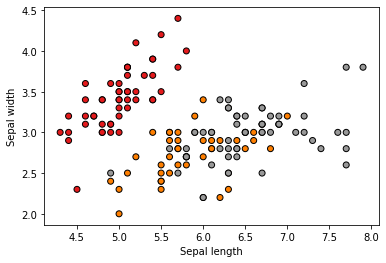

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [15]:
sl=X[:,0]
sd=X[:,1]

In [7]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x,y

In [8]:
def plot_ecdf(data):
    x,y = ecdf(data)
    plt.plot(x,y,marker='.', linestyle='none');

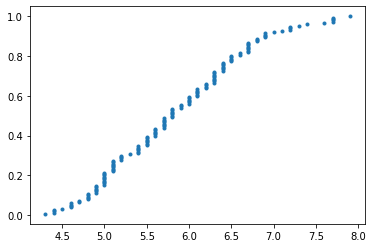

In [9]:
x,y = ecdf(sl)
plt.plot(x,y,marker='.',linestyle='none')

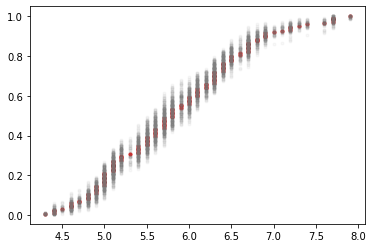

In [10]:
# create bootstrap sample for 50 times
x,y = ecdf(sl)
plt.plot(x,y,marker='.',linestyle='none',color='red',alpha=2)
for i in range(50):
    bs_sample = np.random.choice(sl, size=len(sl))
    x,y = ecdf(bs_sample)
    plt.plot(x,y,marker='.',linestyle='none',color='grey',alpha=0.05)

In [11]:
def draw_bs_replicates(data, method, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = method(bs_sample)
    return bs_replicates

In [12]:
bs_rep1 = draw_bs_replicates(sl, np.mean, 100)

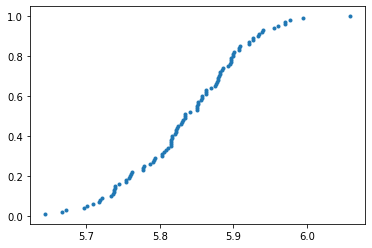

In [13]:
plot_ecdf(bs_rep1)

In [14]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

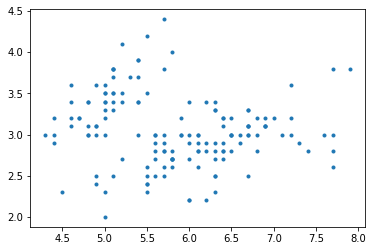

In [17]:
plt.plot(sl,sd,marker='.',linestyle='none')

In [18]:
slope,intcp = np.polyfit(sl, sd, 1)

In [21]:
slope

-0.061884797964143874

In [22]:
intcp

3.4189468361038133

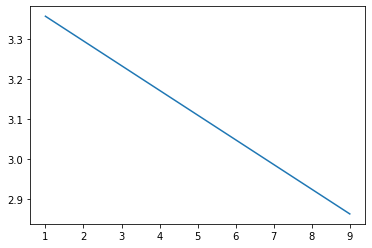

In [29]:
plt.plot(np.arange(1,10),slope*np.arange(1,10)+intcp)